In [ ]:
using TCI4Keldysh
using PythonCall
using PythonPlot
using LaTeXStrings

INCH_TO_PT = 72
PT_TO_INCH = 1.0/INCH_TO_PT
COLUMN_PT = 432
COLUMN_INCH = COLUMN_PT*PT_TO_INCH
PLOT_COLUMN_PT = 420
PLOT_COLUMN_INCH = PLOT_COLUMN_PT*PT_TO_INCH
PLOT_PAGE_PT = PLOT_COLUMN_PT*2
PLOT_PAGE_INCH = PLOT_PAGE_PT*PT_TO_INCH

function set_rcParams(fs::Int=12)
    pyplot.rcParams["font.size"] = fs        # Title font size
    # pyplot.rcParams["axes.labelsize"] = fs               # Axis label font size
    pyplot.rcParams["xtick.labelsize"] = fs             # X-axis tick label font size
    pyplot.rcParams["ytick.labelsize"] = fs             # Y-axis tick label font size
    pyplot.rcParams["legend.fontsize"] = fs             # Legend font size
end
set_rcParams(14)

function annotate_topleft(ax, text; color="black", fontsize=14)
    subplotlabeloffset=3
    ax.annotate(
    text,
    xy=(0,1),
    xycoords="axes fraction",
    horizontalalignment="left",
    verticalalignment="top",
    xytext=(+subplotlabeloffset, -subplotlabeloffset),
    textcoords="offset points",
    color=color,
    fontsize=fontsize
    )
end

function annotate_bottomleft(ax, text; color="black", fontsize=14)
    subplotlabeloffset=3
    ax.annotate(
    text,
    xy=(0,0),
    xycoords="axes fraction",
    horizontalalignment="left",
    verticalalignment="bottom",
    xytext=(+subplotlabeloffset, +subplotlabeloffset),
    textcoords="offset points",
    color=color,
    fontsize=fontsize
    )
end


function annotate_topright(ax, text; color="black", fontsize=14)
    subplotlabeloffset=3
    ax.annotate(
    text,
    xy=(1,1),
    xycoords="axes fraction",
    horizontalalignment="right",
    verticalalignment="top",
    xytext=(-subplotlabeloffset, -subplotlabeloffset),
    textcoords="offset points",
    color=color,
    fontsize=fontsize
    )
end

function annotate_bottomright(ax, text; color="black", fontsize=14)
    subplotlabeloffset=3
    ax.annotate(
    text,
    xy=(1,0),
    xycoords="axes fraction",
    horizontalalignment="right",
    verticalalignment="bottom",
    xytext=(-subplotlabeloffset, +subplotlabeloffset),
    textcoords="offset points",
    color=color,
    fontsize=fontsize
    )
end

"""
legend with one column, labels for colors and markers
"""
function onecol_legend_colormarker(colors, markers, collabels, markerlabels)
    @assert length(colors)>=length(collabels)
    @assert length(markers)>=length(markerlabels)

    mlines = pyimport("matplotlib.lines")
    collines = [mlines.Line2D([], [], color=colors[j], label=collabels[j]) for j in eachindex(collabels)]
    markerlines = [mlines.Line2D([], [], color="black", marker=markers[j], label=markerlabels[j], linestyle="None") for j in eachindex(markerlabels)]

    handles = vcat(collines, markerlines)
    return handles
end

"""
Save figure including a legend outside the figure (bbox_to_anchor with entries > 1.0)
"""
function save_bbox(name::String, fig, lgd)
    fig.savefig(
        name,
        bbox_extra_artists=(lgd,),
        bbox_inches="tight"
        )
end

function abc_annotate(axs; color="black", yoff=nothing, xoff=nothing)
    subplotlabeloffset=3
    alphabet = "abcdefghijklmnopqrstuvwxyz"
    naxs = length(axs.flatten())
    for i in 0:naxs-1
        axs.flatten()[i].annotate(
        "($(alphabet[i+1]))",
        xy=(1,1),
        xycoords="axes fraction",
        horizontalalignment="right",
        verticalalignment="top",
        xytext=(-(isnothing(xoff) ? subplotlabeloffset : xoff), -(isnothing(yoff) ? subplotlabeloffset : yoff)),
        textcoords="offset points",
        color=color
        )
    end
end

function remove_ticks(ax)
    ax.tick_params(
        axis="both",
        which="both",
        labelbottom=false,
        labelleft=false,
        bottom=false,
        left=false
    )
end

function center_ticks(ax)
    ticks = ax.xaxis.get_majorticklabels()
    ticks[0].set_horizontalalignment("left")
    nticks = length(ticks)
    ticks[nticks-1].set_horizontalalignment("right")
end

    CondaPkg Found dependencies: /home/m/M.Frankenbach/.julia/packages/PythonCall/Nr75f/CondaPkg.toml
    CondaPkg Found dependencies: /home/m/M.Frankenbach/.julia/packages/PythonPlot/469aA/CondaPkg.toml
    CondaPkg Dependencies already up to date


center_ticks (generic function with 1 method)

In [2]:
function to_intvec(x) :: Vector{Int}
    return convert(Vector{Int}, x)
end

function onlyJSON(path::AbstractString)
    return only(filter(f -> endswith(f, ".json"), readdir(path; join=true))) 
end

function Rrank(folder::AbstractString, R::Int)
    d = TCI4Keldysh.readJSON(onlyJSON(folder))
    return Rrank(d, R)
end

function Rrank_file(file::AbstractString, R::Int)
    d = TCI4Keldysh.readJSON(file)
    return Rrank(d, R)
end

function Rrank(d::Dict, R::Int)
    Rs = d["Rs"]
    Rid = findfirst(isequal(R), Rs)
    return d["ranks"][Rid]
end

function Rbonddim(d::Dict, R::Int)
    Rs = d["Rs"]
    Rid = findfirst(isequal(R), Rs)
    return d["bonddims"][Rid]
end

function Rbonddim(folder::AbstractString, R::Int)
    d = TCI4Keldysh.readJSON(onlyJSON(folder))
    return Rbonddim(d, R)
end

function Rbonddim_file(file::AbstractString, R::Int)
    d = TCI4Keldysh.readJSON(file)
    return Rbonddim(d, R)
end

function join_data(folders::Vararg{AbstractString,N}) where N
    return join_data_file(onlyJSON.(folders)...)
end

function join_data_file(jsonfiles::Vararg{AbstractString,N}) where N
    Rs_all = []
    bonddims_out = []
    ranks_out = []
    times_out = []
    for file in jsonfiles    
        d = TCI4Keldysh.readJSON(file)
        Rs = d["Rs"]
        nfinish = length(d["ranks"])
        append!(ranks_out, d["ranks"])
        append!(bonddims_out, d["bonddims"])
        append!(times_out, d["times"])
        append!(Rs_all, Rs[1:nfinish])
    end
    d = Dict()
    d["Rs"] = to_intvec(Rs_all)
    d["bonddims"] = to_intvec.(bonddims_out)
    d["ranks"] = to_intvec(ranks_out)
    d["times"] = times_out
    return d
end

basepath = joinpath(TCI4Keldysh.pdatadir(), "cluster_output")
kcspath = joinpath(TCI4Keldysh.pdatadir(), "cluster_output_KCS")

"/scratch/m/M.Frankenbach/tci4keldysh/cluster_output_KCS"

In [ ]:
# load Matsubara data
d1 = TCI4Keldysh.readJSON(onlyJSON(joinpath(basepath, "gamcoreMF_pch_tol3_beta20")), basepath)
d2 = TCI4Keldysh.readJSON(onlyJSON(joinpath(basepath, "gamcoreMF_pch_tol3_beta200")), basepath)
d3 = TCI4Keldysh.readJSON(onlyJSON(joinpath(basepath, "gamcoreMF_pch_tol3_beta2000")), basepath)

f1 = TCI4Keldysh.readJSON(onlyJSON(joinpath(basepath, "fullvertexMF_pch_tol3_beta20")), basepath)
f2 = TCI4Keldysh.readJSON(onlyJSON(joinpath(basepath, "fullvertexMF_pch_tol3_beta200")), basepath)
f3 = TCI4Keldysh.readJSON(onlyJSON(joinpath(basepath, "fullvertexMF_pch_tol3_beta2000")), basepath)

Dict{String, Any} with 12 entries:
  "flavor_idx" => 1
  "times"      => Any[12905.5]
  "ranks"      => Any[86]
  "tcikwargs"  => Dict{String, Any}()
  "numthreads" => 64
  "bonddims"   => Any[Any[2, 4, 8, 16, 32, 44, 58, 62, 48, 68  …  61, 47, 48, 4…
  "Rs"         => Any[10]
  "PSFpath"    => "/scratch/m/M.Frankenbach/tci4keldysh/data/SIAM_u=0.50/PSF_nz…
  "beta"       => 2000.0
  "channel"    => "p"
  "job_id"     => "3742085"
  "tolerance"  => 0.001

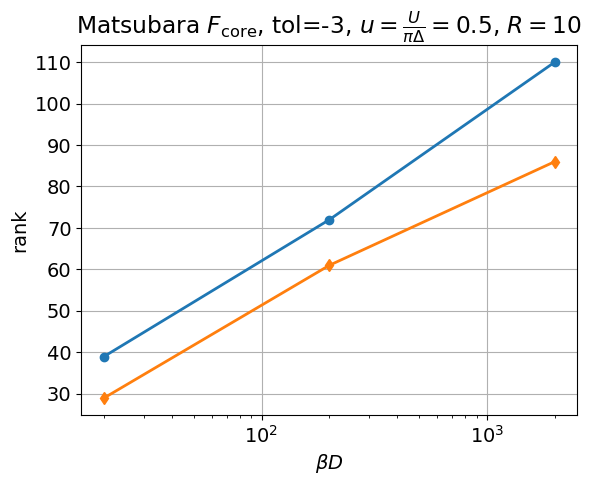

In [23]:
# plot Matsubara core vertex rank for different temperatures
Rs = d1["Rs"]
betas = [20.0, 200.0, 2000.0]
ranks20 = d1["ranks"]
ranks200 = d2["ranks"]
ranks2000 = d3["ranks"]
fullranks20 = f1["ranks"]
fullranks200 = f2["ranks"]
fullranks2000 = f3["ranks"]
betaranks = [d[6] for d in [ranks20,ranks200,ranks2000]]
betafullranks = [only(d) for d in [fullranks20,fullranks200,fullranks2000]]

fig, ax = subplots()
ax.plot(betas, betaranks; label=L"$F_{\mathrm{core}}$", marker="o", linewidth=2)
ax.plot(betas, betafullranks; label=L"F_{\mathrm{full}}", marker="d", linewidth=2)
ax.set_xscale("log")
# plot!(p, Rs, ranks200; label=L"\beta*\Delta=200")
# plot!(p, Rs, ranks2000; label=L"\beta\Delta=2000")
ax.set_title(L"Matsubara $F_{\mathrm{core}}$, tol=-3, $u=\frac{U}{\pi\Delta}=0.5$, $R=10$")
# D: bandwidth
ax.set_xlabel(L"\beta D")
ax.set_ylabel("rank")
ax.grid(true)
savefig("betavsrank.pdf")
display(fig)

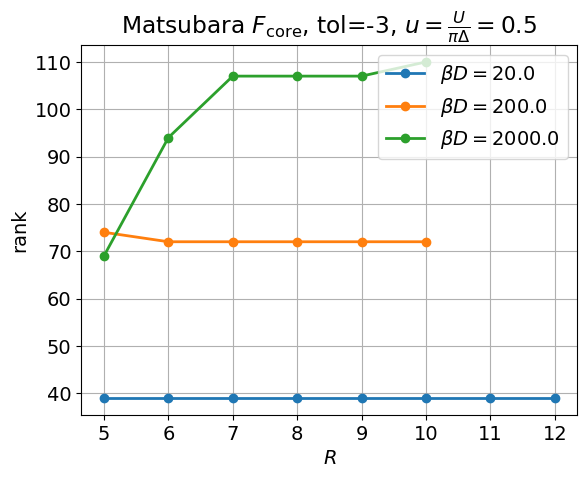

In [26]:
fig, ax = subplots()
for d in [d1,d2,d3]
    ranks = d["ranks"]
    beta = d["beta"]
    ax.plot(d["Rs"][1:length(ranks)], ranks; label=L"\beta D=%$beta", linewidth=2, marker="o")
end
ax.set_xlabel(L"R")
ax.set_ylabel("rank")
ax.set_title(L"Matsubara $F_{\mathrm{core}}$, tol=-3, $u=\frac{U}{\pi\Delta}=0.5$")
ax.grid(true)
ax.legend()
savefig("betaRvsrank.pdf")
display(fig)

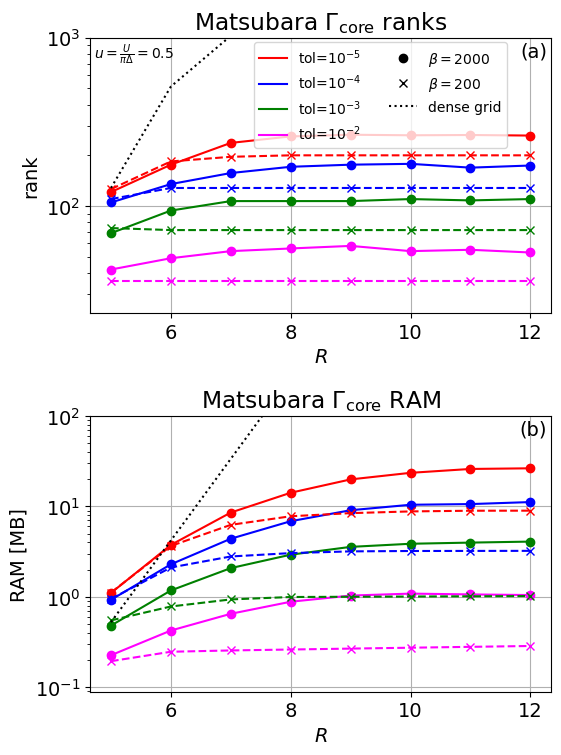

(y1, y2) = (<py np.float64(23.077599371762673)>, <py np.float64(408932.6557747234)>)


In [122]:
# Matsubara rank vs R

# page width
# fig, axs = subplots(1,2, figsize=(PLOT_PAGE_INCH, PLOT_PAGE_INCH*2.5/10))
# column width
fig, axs = subplots(2,1, figsize=(PLOT_COLUMN_INCH, PLOT_COLUMN_INCH*4/3))
axs[0].grid(true)
axs[1].grid(true)

PSFpath1 = joinpath(TCI4Keldysh.datadir(), "SIAM_u=0.50/PSF_nz=4_conn_zavg/")
PSFpath2 = joinpath(TCI4Keldysh.datadir(), "siam05_U0.05_T0.005_Delta0.0318/PSF_nz=2_conn_zavg/")
beta1 = round(Int, TCI4Keldysh.dir_to_beta(PSFpath1))
beta2 = round(Int, TCI4Keldysh.dir_to_beta(PSFpath2))

tol_range = 10.0 .^ (-5:-2)
show_worstcase = true
ramplot = true

logtol(tol) = -round(Int,log10(tol))


Rs = []
allplots = []
colors = ["red", "blue", "green", "magenta", "brown"]
markers = ["o", "x"]
linestyles = ["solid", "dashed"]
for (i,beta) in enumerate([beta1,beta2])
    for (it, tol) in enumerate(tol_range)
        file_act = onlyJSON(joinpath(basepath, "gamcoreMF_pch_tol$(logtol(tol))_beta$(beta)"))
        addfile_act11 = onlyJSON(joinpath(basepath, "gamcoreMF_pch_tol$(logtol(tol))_beta$(beta)_R11"))
        addfile_act12 = onlyJSON(joinpath(basepath, "gamcoreMF_pch_tol$(logtol(tol))_beta$(beta)_R12"))
        files_add = [addfile_act11, addfile_act12]

        # plot
        d = TCI4Keldysh.readJSON(file_act)
        Rs = to_intvec(d["Rs"])
        bonddims = to_intvec.(d["bonddims"])
        push!(bonddims, Rbonddim_file(files_add[1], 11))
        push!(bonddims, Rbonddim_file(files_add[2], 12))
        rams = TCI4Keldysh.bonddims_to_RAM.(bonddims)
        rranks = to_intvec(d["ranks"])
        push!(rranks, Rrank_file(files_add[1], 11))
        push!(rranks, Rrank_file(files_add[2], 12))
        # rank plot
        pact = axs[0].plot(Rs[1:length(rranks)], rranks; linestyle=linestyles[i], color=colors[it], marker=markers[i], label="tol=$(TCI4Keldysh.tolstr(tol))")
        push!(allplots, pact) 
        # RAM plot
        pact = axs[1].plot(Rs[1:length(rranks)], rams; linestyle=linestyles[i], color=colors[it], marker=markers[i], label="tol=$(TCI4Keldysh.tolstr(tol))")
        push!(allplots, pact) 
    end
end

worst_line = nothing
if show_worstcase
    worstcase_ranks = [2^div(3*R,2) for R in Rs]
    worstcase_rams = [16 * 2^(3*R) / 10^6 for R in Rs]
    label = ramplot ? "dense grid" : "worst case"
    worst_line, = axs[0].plot(Rs, worstcase_ranks, label=label, color="black", linestyle=":", marker="None")
    axs[1].plot(Rs, worstcase_rams, label=label, color="black", linestyle=":", marker="None")

    for i in [0,1]
        yticks_exp = if i==0
                Int(floor(log10(worstcase_ranks[1]))):Int(floor(log10(worstcase_ranks[end])))
            else
                Int(floor(log10(worstcase_rams[1]))):Int(floor(log10(worstcase_rams[end])))
            end
        yticks = 10.0 .^ yticks_exp
        yticks_labels = [L"10^{%$y}" for y in yticks_exp]

        axs[i].set_yscale("log")
        axs[i].set_yticks(yticks)
        axs[i].set_yticklabels(yticks_labels)
    end
end

axs[0].set_title(L"Matsubara $\Gamma_{\mathrm{core}}$ ranks")
axs[0].set_xlabel(L"R")
axs[0].set_ylabel("rank")
(y1, y2) = axs[0].get_ylim()
@show (y1,y2)
axs[0].set_ylim(y1, 10^3)
axs[1].set_title(L"Matsubara $\Gamma_{\mathrm{core}}$ RAM")
axs[1].set_xlabel(L"R")
(y1, y2) = axs[1].get_ylim()
axs[1].set_ylim(y1, 10^2)
axs[1].set_ylabel("RAM [MB]")

# annotate
abc_annotate(axs; color="black")
annotate_topleft(axs[0], L"u=\frac{U}{\pi\Delta}=0.5"; fontsize=10)

handles = onecol_legend_colormarker(
    colors,
    markers,
    [L"tol=$10^{%$(TCI4Keldysh.tolstr(tol))}$" for tol in tol_range],
    [L"\beta=2000",L"\beta=200"]
)

lgd = fig.legend(handles=vcat(handles, [worst_line]), ncols=2, bbox_to_anchor=(0.90,0.94), fontsize=10)
fig.tight_layout()
savefig("MFvertex_ranks_tol=$(TCI4Keldysh.tolstr(minimum(tol_range)))to$(TCI4Keldysh.tolstr(maximum(tol_range))).pdf")
# page wide
# lgd = fig.legend(handles=vcat(handles, [worst_line]), ncols=1, bbox_to_anchor=(1.06,0.90), fontsize=10)
# save_bbox(
#     "MFvertex_ranks_tol=$(TCI4Keldysh.tolstr(minimum(tol_range)))to$(TCI4Keldysh.tolstr(maximum(tol_range))).pdf",
#     fig,
#     lgd
# )

display(fig)

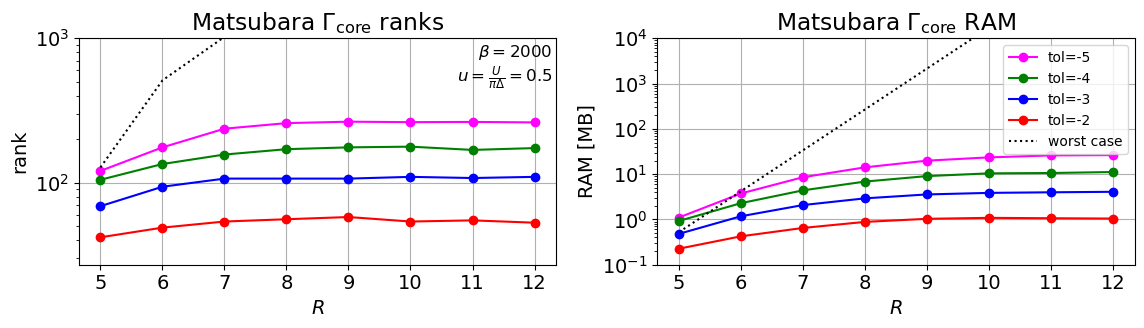

(y1, y2) = (<py np.float64(27.13218432484593)>, <py np.float64(405792.90882664756)>)


In [7]:
# Matsubara rank vs R

fig, axs = subplots(1,2, figsize=(PLOT_PAGE_INCH, PLOT_PAGE_INCH*3/10))
axs[0].grid(true)
axs[1].grid(true)

PSFpath1 = joinpath(TCI4Keldysh.datadir(), "SIAM_u=0.50/PSF_nz=4_conn_zavg/")
beta1 = round(Int, TCI4Keldysh.dir_to_beta(PSFpath1))

tol_range = 10.0 .^ (-5:-2)
show_worstcase = true
ramplot = true

logtol(tol) = -round(Int,log10(tol))


Rs = []
allplots = []
colors = reverse(["red", "blue", "green", "magenta"])
markers = ["o", "d"]
for (it, tol) in enumerate(tol_range)
    file_act1 = onlyJSON(joinpath(basepath, "gamcoreMF_pch_tol$(logtol(tol))_beta$(beta1)"))
    addfile_act11 = onlyJSON(joinpath(basepath, "gamcoreMF_pch_tol$(logtol(tol))_beta$(beta1)_R11"))
    addfile_act12 = onlyJSON(joinpath(basepath, "gamcoreMF_pch_tol$(logtol(tol))_beta$(beta1)_R12"))
    files = [file_act1]
    files_add1 = [addfile_act11, addfile_act12]
    files_add = [files_add1]
    for i in eachindex(files)
        file_act = files[i]

        # plot
        d = TCI4Keldysh.readJSON(file_act)
        Rs = to_intvec(d["Rs"])
        bonddims = to_intvec.(d["bonddims"])
        push!(bonddims, Rbonddim_file(files_add[i][1], 11))
        push!(bonddims, Rbonddim_file(files_add[i][2], 12))
        rams = TCI4Keldysh.bonddims_to_RAM.(bonddims)
        rranks = to_intvec(d["ranks"])
        push!(rranks, Rrank_file(files_add[i][1], 11))
        push!(rranks, Rrank_file(files_add[i][2], 12))
        # rank plot
        pact = axs[0].plot(Rs[1:length(rranks)], rranks; color=colors[it], marker=markers[i], label="tol=$(TCI4Keldysh.tolstr(tol))")
        push!(allplots, pact) 
        # RAM plot
        pact = axs[1].plot(Rs[1:length(rranks)], rams; color=colors[it], marker=markers[i], label="tol=$(TCI4Keldysh.tolstr(tol))")
        push!(allplots, pact) 
    end
end

worst_line = nothing
if show_worstcase
    worstcase_ranks = [2^div(3*R,2) for R in Rs]
    worstcase_rams = [16 * 2^(3*R) / 10^6 for R in Rs]
    label = ramplot ?  "worst case" : "dense grid"
    worst_line, = axs[0].plot(Rs, worstcase_ranks, label=label, color="black", linestyle=":", marker="None")
    axs[1].plot(Rs, worstcase_rams, label=label, color="black", linestyle=":", marker="None")

    for i in [0,1]
        yticks_exp = if i==0
                Int(floor(log10(worstcase_ranks[1]))):Int(floor(log10(worstcase_ranks[end])))
            else
                Int(floor(log10(worstcase_rams[1]))):Int(floor(log10(worstcase_rams[end])))
            end
        yticks = 10.0 .^ yticks_exp
        yticks_labels = [L"10^{%$y}" for y in yticks_exp]

        axs[i].set_yscale("log")
        axs[i].set_yticks(yticks)
        axs[i].set_yticklabels(yticks_labels)
    end
end

axs[0].set_title(L"Matsubara $\Gamma_{\mathrm{core}}$ ranks")
axs[0].set_xlabel(L"R")
axs[0].set_ylabel("rank")
(y1, y2) = axs[0].get_ylim()
@show (y1,y2)
axs[0].set_ylim(y1, 10^3)
axs[1].set_title(L"Matsubara $\Gamma_{\mathrm{core}}$ RAM")
axs[1].set_xlabel(L"R")
(y1, y2) = axs[1].get_ylim()
axs[1].set_ylim(y1, 10^4)
axs[1].set_ylabel("RAM [MB]")

# annotate
# abc_annotate(axs; color="black")
annotate_topright(axs[0], L"\beta=2000" * "\n" * L"u=\frac{U}{\pi\Delta}=0.5"; fontsize=12)

# handles = onecol_legend_colormarker(
#     colors,
#     ["o"],
#     [L"tol=$10^{%$(TCI4Keldysh.tolstr(tol))}$" for tol in tol_range],
#     [L"\beta=2000"]
# )
axs[1].legend(loc="upper right", fontsize=10)

# lgd = fig.legend(handles=vcat(handles, [worst_line]), ncols=1, bbox_to_anchor=(1.06,0.90))
fig.tight_layout()
# save_bbox(
#     "MFvertex_ranks_tol=$(TCI4Keldysh.tolstr(minimum(tol_range)))to$(TCI4Keldysh.tolstr(maximum(tol_range))).pdf",
#     fig,
#     lgd
# )
savefig("MFvertex_ranks_tol=$(TCI4Keldysh.tolstr(minimum(tol_range)))to$(TCI4Keldysh.tolstr(maximum(tol_range))).pdf")
display(fig)

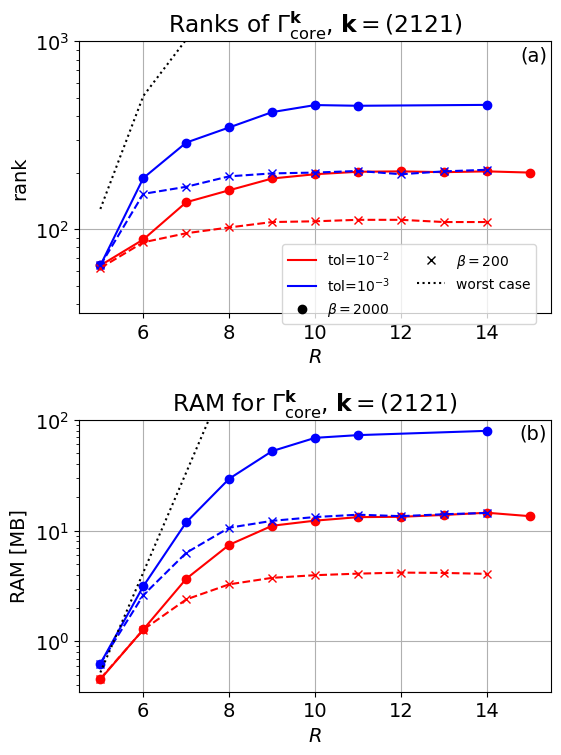

d2["Rs"] = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
TCI4Keldysh.bonddims_to_RAM.(d2["bonddims"], 8) = [0.454656, 1.28, 3.675904, 7.44064, 11.058432, 12.29824, 13.224704, 13.32352, 13.844992, 14.49408, 13.497472]
worstcase_rams = [0.524288, 4.194304, 33.554432, 268.435456, 2147.483648, 17179.869184, 137438.953472, 1.099511627776e6, 8.796093022208e6, 7.0368744177664e7, 5.62949953421312e8]


In [8]:
# load Keldysh vertex data

# tolerance 2
f21 = joinpath(kcspath, "V_KF_bigbox_tol2_R0509")
f22 = joinpath(kcspath, "V_KF_bigbox_tol2_R1013")
f23 = joinpath(kcspath, "V_KF_bigbox_tol2_R1415")
d2 = join_data(f21,f22,f23)

# tolerance 3
f31 = joinpath(kcspath, "V_KF_bigbox_tol3_R0509")
f32 = joinpath(kcspath, "V_KF_bigbox_tol3_R1013")
f33 = joinpath(kcspath, "V_KF_bigbox_tol3_R1415")
d3 = join_data(f31,f32,f33)

# tolerance 2, beta200
e21 = joinpath(kcspath, "V_KF_bigbox_tol2_beta200_R0509")
e22 = joinpath(kcspath, "V_KF_bigbox_tol2_beta200_R1013")
e23 = joinpath(kcspath, "V_KF_bigbox_tol2_beta200_R1415")
d22 = join_data(e21,e22,e23)

# tolerance 3, beta200
e31 = joinpath(kcspath, "V_KF_bigbox_tol3_beta200_R0509")
e32 = joinpath(kcspath, "V_KF_bigbox_tol3_beta200_R1013")
e33 = joinpath(kcspath, "V_KF_bigbox_tol3_beta200_R1415")
d33 = join_data(e31,e32,e33)


# page width
# fig, ax = subplots(1,2, figsize=(PLOT_PAGE_INCH, PLOT_PAGE_INCH*3.3/10))
# column width
fig, ax = subplots(2,1, figsize=(PLOT_COLUMN_INCH, PLOT_COLUMN_INCH*4/3))

# worst case
ramplot = false
Rs = 5:15
worstcase_ranks = [2^div(3*R,2) for R in Rs]
worstcase_rams = [16 * 2^(3*R) / 10^6 for R in Rs]
label = ramplot ? "dense grid" : "worst case"
worst_line, = ax[0].plot(Rs, worstcase_ranks, label=label, color="black", linestyle=":", marker="None")

# ranks
ax[0].plot(d2["Rs"], d2["ranks"]; label=L"tol=$10^{-2}$", marker="o", color="red")
ax[0].plot(d3["Rs"], d3["ranks"]; label=L"tol=$10^{-3}$", marker="o", color="blue")
ax[0].plot(d22["Rs"], d22["ranks"]; label=L"tol=$10^{-2}$", marker="x", color="red", linestyle="dashed")
ax[0].plot(d33["Rs"], d33["ranks"]; label=L"tol=$10^{-3}$", marker="x", color="blue", linestyle="dashed")
ax[0].set_xlabel(L"R")
ax[0].set_ylabel("rank")
ax[0].set_title(L"Ranks of $\Gamma_{\mathrm{core}}^{\mathbf{k}}$, $\mathbf{k}=(2121)$")
# ax[0].legend()
ax[0].grid(true)
ax[0].set_yscale("log")
(y1,y2) = ax[0].get_ylim()
ax[0].set_ylim(y1, 10^3)

# RAM
ax[1].plot(d2["Rs"], TCI4Keldysh.bonddims_to_RAM.(d2["bonddims"], 8); label=L"tol=$10^{-2}$", marker="o", color="red")
ax[1].plot(d3["Rs"], TCI4Keldysh.bonddims_to_RAM.(d3["bonddims"], 8); label=L"tol=$10^{-3}$", marker="o", color="blue")
ax[1].plot(d22["Rs"], TCI4Keldysh.bonddims_to_RAM.(d22["bonddims"], 8); label=L"tol=$10^{-2}$", marker="x", color="red", linestyle="dashed")
ax[1].plot(d33["Rs"], TCI4Keldysh.bonddims_to_RAM.(d33["bonddims"], 8); label=L"tol=$10^{-3}$", marker="x", color="blue", linestyle="dashed")
ax[1].set_xlabel(L"R")
ax[1].set_ylabel("RAM [MB]")
ax[1].set_title(L"RAM for $\Gamma_{\mathrm{core}}^{\mathbf{k}}$, $\mathbf{k}=(2121)$")
# ax[1].legend(loc="lower right", fontsize=12)
ax[1].grid(true)
ax[1].set_yscale("log")
(y1,y2) = ax[1].get_ylim()
ax[1].set_ylim(y1, 10^2)
worst_line_ram, = ax[1].plot(Rs, worstcase_rams, label=label, color="black", linestyle=":", marker="None")

colors = ["red", "blue"]
markers = ["o", "x"]
tol_range = [1.e-2, 1.e-3]
handles = onecol_legend_colormarker(
    colors,
    markers,
    [L"tol=$10^{%$(TCI4Keldysh.tolstr(tol))}$" for tol in tol_range],
    [L"\beta=2000",L"\beta=200"]
)

lgd = fig.legend(handles=vcat(handles, [worst_line]), ncols=2, bbox_to_anchor=(0.95,0.68), fontsize=10)

ommax = TCI4Keldysh.readJSON(onlyJSON(f21))["ommax"]
# annotate_bottomright(ax[0], L"\beta=2000" * "\n" * L"u=0.5" * "\n" * L"ω_{\max}=%$ommax"; fontsize=10)
fig.tight_layout()
abc_annotate(ax; color="black")
savefig("V_KF_ranks.pdf")
display(fig)
@show d2["Rs"]
@show TCI4Keldysh.bonddims_to_RAM.(d2["bonddims"], 8)
@show worstcase_rams;

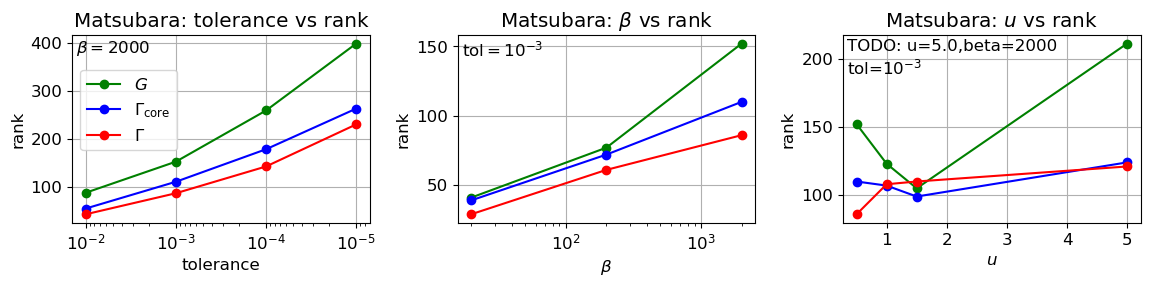

Python: None

In [26]:
# Matsubara: tolerance, beta and u vs. rank for full/core vertex + full correlator at R=10

# PSFpaths = [
#     joinpath(TCI4Keldysh.datadir(), "siam05_U0.05_T0.005_Delta0.0318/PSF_nz=2_conn_zavg/"),
#     joinpath(TCI4Keldysh.datadir(), "SIAM_u=0.50/PSF_nz=4_conn_zavg/")
#     joinpath(TCI4Keldysh.datadir(), "siam05_U0.05_T0.05_Delta0.0318/PSF_nz=2_conn_zavg/"),
#     ]

# plot
fig, axs = subplots(1, 3, figsize=(PLOT_PAGE_INCH, PLOT_PAGE_INCH*1.3/5))
set_rcParams(12)

for ax in axs
    ax.grid(true)
end

R = 10

# tol vs rank
    # collect data
tol_int = -5:-2
tol_range = collect(10.0 .^ tol_int)
    # collect data
corr_ranks = Int[]
V_ranks = Int[]
Vfull_ranks = Int[]
for tol in tol_int
    folder = joinpath(basepath, "corrMF_pch_tol$(-tol)_beta2000")
    d = TCI4Keldysh.readJSON(onlyJSON(folder))
    push!(corr_ranks, Rrank(d, R))

    folder = joinpath(basepath, "gamcoreMF_pch_tol$(-tol)_beta2000")
    d = TCI4Keldysh.readJSON(onlyJSON(folder))
    push!(V_ranks, Rrank(d,R))

    folder = joinpath(basepath, "fullvertexMF_pch_tol$(-tol)_beta2000")
    d = TCI4Keldysh.readJSON(onlyJSON(folder))
    push!(Vfull_ranks, Rrank(d,R))
end

axs[0].plot(tol_range, corr_ranks; color="green", marker="o", label=L"G")
axs[0].plot(tol_range, V_ranks; color="blue", marker="o", label=L"\Gamma_{\mathrm{core}}")
axs[0].plot(tol_range, Vfull_ranks; color="red", marker="o", label=L"\Gamma")
axs[0].set_xscale("log")
axs[0].set_ylabel("rank")
axs[0].set_xlabel("tolerance")
axs[0].set_title("Matsubara: tolerance vs rank")
axs[0].invert_xaxis()
axs[0].legend(loc="center left", bbox_to_anchor=(0.0,0.6))
annotate_topleft(axs[0], L"\beta=2000")

# beta vs rank
    # collect data
betas = [20, 200, 2000]
corr_ranks = Int[]
V_ranks = Int[]
Vfull_ranks = Int[]

for beta in betas

    folder = joinpath(basepath, "corrMF_pch_tol3_beta$(beta)")
    push!(corr_ranks, Rrank(folder, R))

    folder = joinpath(basepath, "gamcoreMF_pch_tol3_beta$(beta)")
    push!(V_ranks, Rrank(folder, R))

    folder = joinpath(basepath, "fullvertexMF_pch_tol3_beta$(beta)")
    push!(Vfull_ranks, Rrank(folder, R))
end

axs[1].plot(betas, corr_ranks; color="green", marker="o", label=L"G")
axs[1].plot(betas, V_ranks; color="blue", marker="o", label=L"\Gamma_{\mathrm{core}}")
axs[1].plot(betas, Vfull_ranks; color="red", marker="o", label=L"\Gamma")
axs[1].set_xscale("log")
axs[1].set_ylabel("rank")
axs[1].set_xlabel(L"\beta")
axs[1].set_title(L"Matsubara: $\beta$ vs rank")
annotate_topleft(axs[1], L"tol$=10^{-3}$")

# u vs rank
    # collect data, beta=2000, tol=1.e-3
us = [0.5, 1.0, 1.5, 5.0]
corr_ranks = Int[]
V_ranks = Int[]
Vfull_ranks = Int[]

folder = joinpath(basepath, "corrMF_pch_tol3_beta2000")
push!(corr_ranks, Rrank(folder, R))
folder = joinpath(basepath, "corrMF_u1.0")
push!(corr_ranks, Rrank(folder, R))
folder = joinpath(basepath, "corrMF_u1.5")
push!(corr_ranks, Rrank(folder, R))
folder = joinpath(basepath, "corrMF_u5.0")
push!(corr_ranks, Rrank(folder, R))


folder = joinpath(basepath, "gamcoreMF_pch_tol3_beta2000")
push!(V_ranks, Rrank(folder, R))
folder = joinpath(basepath, "gamcoreMF_pch_u=1.0_tol3_beta2000")
push!(V_ranks, Rrank(folder, R))
folder = joinpath(basepath, "gamcoreMF_pch_u=1.50_tol3_beta2000")
push!(V_ranks, Rrank(folder, R))
folder = joinpath(basepath, "gamcoreMF_pch_u=5.0_tol3")
push!(V_ranks, Rrank(folder, R))

folder = joinpath(basepath, "fullvertexMF_pch_tol3_beta2000")
push!(Vfull_ranks, Rrank(folder, R))
for u in us[2:end]
    folder = joinpath(basepath, "fullvertexcMF_pch_tol3_u=$u")
    push!(Vfull_ranks, Rrank(folder, R))
end

axs[2].plot(us, corr_ranks; color="green", marker="o", label=L"G, \beta=2000")
axs[2].plot(us, V_ranks; color="blue", marker="o", label=L"\Gamma_{\mathrm{core}}, \tol=$10^{-3}$")
axs[2].plot(us, Vfull_ranks; color="red", marker="o", label=L"\Gamma, \tol=$10^{-3}$")
axs[2].set_ylabel("rank")
axs[2].set_xlabel(L"u")
axs[2].set_title(L"Matsubara: $u$ vs rank")
annotate_topleft(axs[2], "TODO: u=5.0,beta=2000" * "\n" * L"tol=$10^{-3}$")

# fig.legend(bbox_to_anchor=(0.9,0.9))
tight_layout()

display(fig)
savefig("MF_params_vs_rank.pdf")


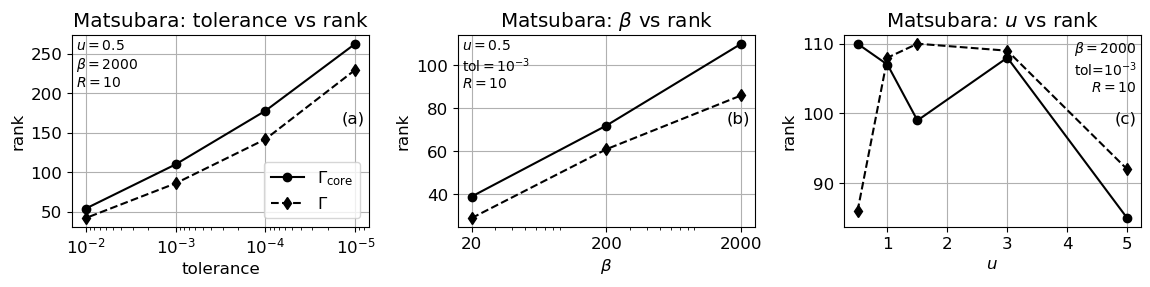

In [12]:

# Matsubara: tolerance, beta and u vs. rank for full/core vertex

# PSFpaths = [
#     joinpath(TCI4Keldysh.datadir(), "siam05_U0.05_T0.005_Delta0.0318/PSF_nz=2_conn_zavg/"),
#     joinpath(TCI4Keldysh.datadir(), "SIAM_u=0.50/PSF_nz=4_conn_zavg/")
#     joinpath(TCI4Keldysh.datadir(), "siam05_U0.05_T0.05_Delta0.0318/PSF_nz=2_conn_zavg/"),
#     ]

# plot
fig, axs = subplots(1, 3, figsize=(PLOT_PAGE_INCH, PLOT_PAGE_INCH*1.3/5))
set_rcParams(12)

for ax in axs
    ax.grid(true)
end

R = 10

# tol vs rank
    # collect data
tol_int = -5:-2
tol_range = collect(10.0 .^ tol_int)
    # collect data
V_ranks = Int[]
Vfull_ranks = Int[]
for tol in tol_int
    folder = joinpath(basepath, "gamcoreMF_pch_tol$(-tol)_beta2000")
    d = TCI4Keldysh.readJSON(onlyJSON(folder))
    push!(V_ranks, Rrank(d,R))

    folder = joinpath(basepath, "fullvertexMF_pch_tol$(-tol)_beta2000")
    d = TCI4Keldysh.readJSON(onlyJSON(folder))
    push!(Vfull_ranks, Rrank(d,R))
end

axs[0].plot(tol_range, V_ranks; color="black", marker="o", label=L"\Gamma_{\mathrm{core}}")
axs[0].plot(tol_range, Vfull_ranks; linestyle="dashed", color="black", marker="d", label=L"\Gamma")
axs[0].set_xscale("log")
axs[0].set_ylabel("rank")
axs[0].set_xlabel("tolerance")
axs[0].set_title("Matsubara: tolerance vs rank")
axs[0].invert_xaxis()
# axs[0].legend(loc="center left", bbox_to_anchor=(0.0,0.6))
axs[0].legend(loc="lower right")
annotate_topleft(axs[0], L"u=0.5" * "\n" * L"\beta=2000" * "\n" * L"R=10"; fontsize=10)

# beta vs rank
    # collect data
betas = [20, 200, 2000]
V_ranks = Int[]
Vfull_ranks = Int[]

for beta in betas

    folder = joinpath(basepath, "gamcoreMF_pch_tol3_beta$(beta)")
    push!(V_ranks, Rrank(folder, R))

    folder = joinpath(basepath, "fullvertexMF_pch_tol3_beta$(beta)")
    push!(Vfull_ranks, Rrank(folder, R))
end

axs[1].plot(betas, V_ranks; color="black", marker="o", label=L"\Gamma_{\mathrm{core}}")
axs[1].plot(betas, Vfull_ranks; linestyle="dashed", color="black", marker="d", label=L"\Gamma")
axs[1].set_xscale("log")
axs[1].set_ylabel("rank")
axs[1].set_xlabel(L"\beta")
axs[1].set_xticks(betas)
axs[1].set_xticklabels(["$(Int(beta))" for beta in betas])
axs[1].set_title(L"Matsubara: $\beta$ vs rank")
annotate_topleft(axs[1], L"u=0.5" * "\n" * L"tol$=10^{-3}$" * "\n" * L"R=10"; fontsize=10)

# u vs rank
    # collect data, beta=2000, tol=1.e-3
us = [0.5, 1.0, 1.5, 3.0, 5.0]
V_ranks = Int[]
Vfull_ranks = Int[]

push!(V_ranks, Rrank(joinpath(basepath, "gamcoreMF_pch_tol3_beta2000"), R))
push!(V_ranks, Rrank(joinpath(basepath, "gamcoreMF_pch_u=1.0_tol3_beta2000"), R))
push!(V_ranks, Rrank(joinpath(basepath, "gamcoreMF_pch_u=1.50_tol3_beta2000"), R))
push!(V_ranks, Rrank(joinpath(basepath, "matsubaracore_u3"), R))
push!(V_ranks, Rrank(joinpath(basepath, "matsubaracore_u5"), R))

push!(Vfull_ranks, Rrank(joinpath(basepath, "fullvertexMF_pch_tol3_beta2000"), R))
for u in us[2:end-2]
    push!(Vfull_ranks, Rrank(joinpath(basepath, "fullvertexcMF_pch_tol3_u=$u"), R))
end
push!(Vfull_ranks, Rrank(joinpath(basepath, "matsubarafull_u3"), R))
push!(Vfull_ranks, Rrank(joinpath(basepath, "matsubarafull_u5"), R))

axs[2].plot(us, V_ranks; color="black", marker="o", label=L"\Gamma_{\mathrm{core}}, \tol=$10^{-3}$")
axs[2].plot(us, Vfull_ranks; linestyle="dashed", color="black", marker="d", label=L"\Gamma, \tol=$10^{-3}$")
axs[2].set_ylabel("rank")
axs[2].set_xlabel(L"u")
axs[2].set_title(L"Matsubara: $u$ vs rank")
annotate_topright(axs[2], L"\beta=2000" * "\n" * L"tol=$10^{-3}$" * "\n" * L"R=10"; fontsize=10)

# fig.legend(bbox_to_anchor=(0.9,0.9))
abc_annotate(axs; yoff=55)
tight_layout()

savefig("MF_params_vs_rank.pdf")
display(fig)

V_ranks = [359, 278, 250, 203]
Vfull_ranks = [226, 163, 137, 111]
V_ranks = [79, 110, 203]
Vfull_ranks = [27, 68, 111]
V_ranks = [203, 256, 236, 163, 112]
Vfull_ranks = [111, 180, 178, 128, 106]


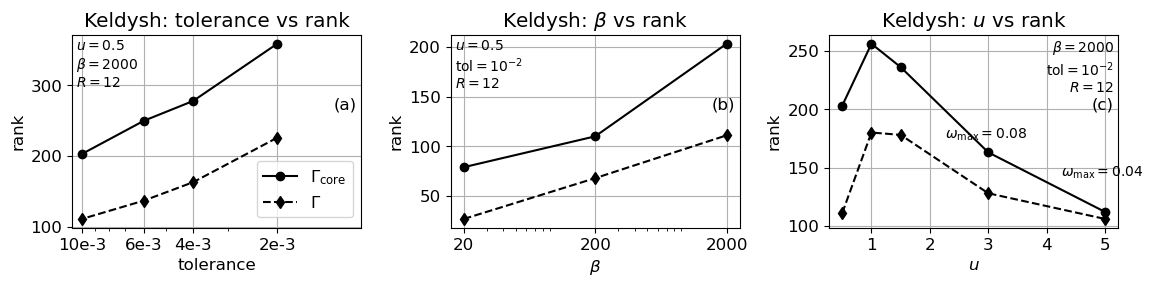

In [14]:
# Keldysh: tolerance, beta and u vs. rank for full/core vertex + full correlator at R=10
# PSFpaths = [
#     joinpath(TCI4Keldysh.datadir(), "siam05_U0.05_T0.005_Delta0.0318/PSF_nz=2_conn_zavg/"),
#     joinpath(TCI4Keldysh.datadir(), "SIAM_u=0.50/PSF_nz=4_conn_zavg/")
#     joinpath(TCI4Keldysh.datadir(), "siam05_U0.05_T0.05_Delta0.0318/PSF_nz=2_conn_zavg/"),
#     ]

# plot
fig, axs = subplots(1, 3, figsize=(PLOT_PAGE_INCH, PLOT_PAGE_INCH*1.3/5))
set_rcParams(12)

for ax in axs
    ax.grid(true)
end

R = 12
ms = ["o","d"]
lsts = ["solid", "dashed"]
cls = ["black", "black"]

# tol vs rank
    # collect data
tol_range = [2.e-3, 4.e-3, 6.e-3, 1.e-2]
    # collect data
# corr_ranks = Int[]
V_ranks = Int[]
V_files = [
    # "V_KF_bigbox_tol3_R1013"
    "V_KF_bigbox_tol3.2"
    "V_KF_bigbox_tol3.4"
    "V_KF_bigbox_tol3.6"
    "V_KF_bigbox_tol2_R1013"
]
Vfull_ranks = Int[]
V_full_files = [
    # "V_KF_full_bigbox_tol3"
    "V_KF_full_bigbox_tol3.2"
    "V_KF_full_bigbox_tol3.4"
    "V_KF_full_bigbox_tol3.6"
    "V_KF_full_bigbox_pch"
]
for i in 1:4
    push!(V_ranks, Rrank(joinpath(kcspath, V_files[i]), R))
    push!(Vfull_ranks, Rrank(joinpath(kcspath, V_full_files[i]), R))
end

@show V_ranks
@show Vfull_ranks


# axs[0].plot(tol_range, corr_ranks; color="green", marker="o", label=L"G")
axs[0].plot(tol_range, V_ranks; color=cls[1], marker=ms[1], ls=lsts[1], label=L"\Gamma_{\mathrm{core}}")
axs[0].plot(tol_range, Vfull_ranks; color=cls[2], marker=ms[2], ls=lsts[2], label=L"\Gamma")
axs[0].set_xscale("log")
axs[0].set_ylabel("rank")
axs[0].set_xlabel("tolerance")
axs[0].set_title("Keldysh: tolerance vs rank")
axs[0].invert_xaxis()
axs[0].legend(loc="center right", bbox_to_anchor=(1.0,0.2))
axs[0].set_xticks([1.e-2,1.e-3])
axs[0].tick_params(labelbottom=false, bottom=false)
axs[0].set_xticks(tol_range)
ticklabels = ["$(Int(t/1.e-3))e-3" for t in tol_range]
axs[0].set_xticklabels(ticklabels)
axs[0].tick_params(labelbottom=true, bottom=true)
annotate_topleft(axs[0], L"u=0.5" * "\n" * L"\beta=2000" * "\n" * L"R=12"; fontsize=10)

# beta vs rank
    # collect data
betas = [20, 200, 2000]
# corr_ranks = Int[]
V_ranks = Int[]
V_files = [
    "V_KF_bigbox_tol2_beta20"
    "V_KF_bigbox_tol2_beta200"
    "V_KF_bigbox_tol2_R1013"
]
Vfull_ranks = Int[]
V_full_files = [
    "V_KF_full_bigbox_beta20"
    "V_KF_full_bigbox_beta200"
    "V_KF_full_bigbox_pch"
]

for i in 1:3
    push!(V_ranks, Rrank(joinpath(kcspath, V_files[i]), R))
    push!(Vfull_ranks, Rrank(joinpath(kcspath, V_full_files[i]), R))
end

@show V_ranks
@show Vfull_ranks

# axs[1].plot(betas, corr_ranks; color="green", marker="o", label=L"G")
axs[1].plot(betas, V_ranks; color=cls[1], marker=ms[1], ls=lsts[1], label=L"\Gamma_{\mathrm{core}}")
axs[1].plot(betas, Vfull_ranks; color=cls[2], marker=ms[2], ls=lsts[2], label=L"\Gamma")
axs[1].set_xscale("log")
axs[1].set_ylabel("rank")
axs[1].set_xlabel(L"\beta")
axs[1].set_xticks(betas)
axs[1].set_xticklabels(["$(Int(beta))" for beta in betas])
axs[1].set_title(L"Keldysh: $\beta$ vs rank")
annotate_topleft(axs[1], L"u=0.5" * "\n" * L"tol$=10^{-2}$" * "\n" * L"R=12"; fontsize=10)

# u vs rank
us = [0.5, 1.0, 1.5, 3.0, 5.0]
# corr_ranks = Int[]
V_ranks = Int[]
V_files = [
    "V_KF_bigbox_tol2_R1013"
    "V_KF_bigbox_tol2_u1.0"
    "V_KF_bigbox_tol2_u1.5"
    "V_KF_tol2_u3"
    "V_KF_tol2_u5_beta2000"
]
Vfull_ranks = Int[]
V_full_files = [
    "V_KF_full_bigbox_pch"
    "V_KF_full_bigbox_u1.0"
    "V_KF_full_bigbox_u1.5"
    "V_KF_full_tol2_u3"
    "V_KF_full_tol2_u5"
]
for i in 1:length(us)
    push!(V_ranks, Rrank(joinpath(kcspath, V_files[i]), R) )
    push!(Vfull_ranks, Rrank(joinpath(kcspath, V_full_files[i]), R) )
end

@show V_ranks
@show Vfull_ranks

# axs[2].plot(us, corr_ranks; color="green", marker="o", label=L"G, \beta=2000")
axs[2].plot(us, V_ranks; color=cls[1], marker=ms[1], ls=lsts[1], label=L"\Gamma_{\mathrm{core}}, \tol=$10^{-3}$")
axs[2].plot(us, Vfull_ranks; color=cls[2], marker=ms[2], ls=lsts[2], label=L"\Gamma, \tol=$10^{-3}$")
axs[2].set_ylabel("rank")
axs[2].set_xlabel(L"u")
axs[2].set_title(L"Keldysh: $u$ vs rank")
# annotate_topleft(axs[2], "TODO: u=5.0,beta=2000" * "\n" * L"tol=$10^{-3}$")
annotate_topright(axs[2], L"\beta=2000" * "\n" * L"tol$=10^{-2}$" * "\n" * L"R=12"; fontsize=10)

axs[2].annotate(
    L"\omega_{\max}=0.08",
    xy=(0.7,0.55),
    xycoords="axes fraction",
    horizontalalignment="right",
    verticalalignment="top",
    xytext=(-3, -3),
    textcoords="offset points",
    color="black",
    fontsize=10
)

axs[2].annotate(
    L"\omega_{\max}=0.04",
    xy=(1.1,0.35),
    xycoords="axes fraction",
    horizontalalignment="right",
    verticalalignment="top",
    xytext=(-3, -3),
    textcoords="offset points",
    color="black",
    fontsize=10
)

# fig.legend(bbox_to_anchor=(0.9,0.9))
abc_annotate(axs; yoff=45)
tight_layout()
savefig("KF_params_vs_rank.pdf")
display(fig)

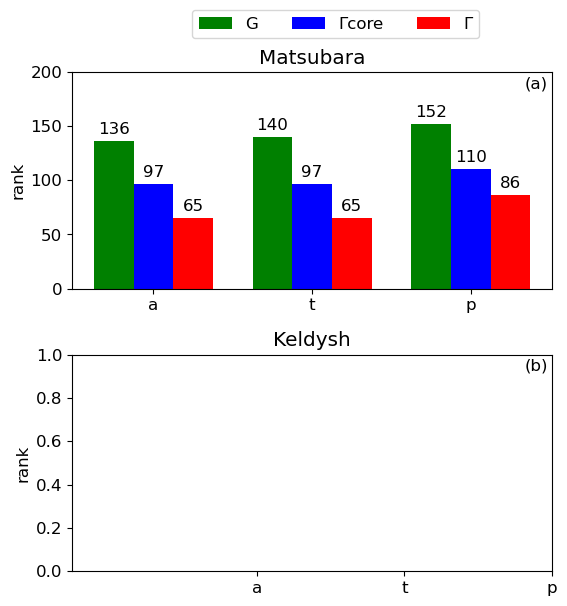

In [19]:
# channel dependence: Keldysh and Matsubara; three channels; correlator, core and full vertex

fig, axs = subplots(2, 1, figsize=(PLOT_COLUMN_INCH,  PLOT_COLUMN_INCH))

R = 10
# Matsubara
corr = Int[]
# TODO

V_ranks = Int[]
folder = joinpath(basepath, "gamcoreMF_ach_tol3_beta2000_R10")
push!(V_ranks, Rrank(folder, R))
# TODO tch
folder = joinpath(basepath, "gamcoreMF_tch_tol3_beta2000_R10")
push!(V_ranks, Rrank(folder, R))
folder = joinpath(basepath, "gamcoreMF_pch_tol3_beta2000")
push!(V_ranks, Rrank(folder, R))

Vfull_ranks = Int[]
folder = joinpath(basepath, "fullvertex_MF_ach_tol3")
push!(Vfull_ranks, Rrank(folder, R))
folder = joinpath(basepath, "fullvertex_MF_tch_tol3")
push!(Vfull_ranks, Rrank(folder, R))
folder = joinpath(basepath, "fullvertexMF_pch_tol3_beta2000")
push!(Vfull_ranks, Rrank(folder, R))

corr = Int[]
folder = joinpath(basepath, "corrMF_ach")
push!(corr, Rrank(folder, R))
folder = joinpath(basepath, "corrMF_tch")
push!(corr, Rrank(folder, R))
folder = joinpath(basepath, "corrMF_pch_tol3_beta2000")
push!(corr, Rrank(folder, R))

# plot
channels = ["a", "t", "p"]
barw = 0.25
cc = 0
x = collect(Base.OneTo(length(channels)))

data = [corr, V_ranks, Vfull_ranks]
labels = ["G", "Γcore", "Γ"]
colors = ["green", "blue", "red"]
# labels = ["one", "two", "three"]
handles = []
for (ic, c) in enumerate(channels)
    offset = barw * cc
    rects = axs[0].bar(x .+ offset, data[ic], barw, label=labels[ic], color=colors[ic])
    axs[0].bar_label(rects, padding=3)
    push!(handles, rects)
    cc += 1
end

axs[0].set_title("Matsubara")
axs[1].set_title("Keldysh")
axs[0].set_ylabel("rank")
axs[1].set_ylabel("rank")
axs[0].set_xticks(x .+ barw, channels)
axs[1].set_xticks(x .+ barw, channels)
# axs[0].legend(loc="upper left", ncols=3)
axs[0].set_ylim(0, 200)
abc_annotate(axs)

lgd = fig.legend(handles=handles, ncols=3, bbox_to_anchor=(0.85,1.05))
fig.tight_layout()
save_bbox(
    "channel_comparison.pdf",
    fig,
    lgd
)
display(fig)


In [10]:
# Keldysh slice plot
using Serialization
using BenchmarkTools
import QuanticsGrids as QG

#=
Nice to show:
V_KF_bigbox_tol2_R1013, R=13
V_KF_bigbox_tol2_u1.5, R=12 (smaller box would come in handy)
V_KF_bigbox_tol2_u5, R=12 (checked for beta=10^4 data set)
V_KF_bigbox_tol2_beta20, R=12

take care of using an appropriate box size for ref-tci-error triptychs!
=#

folder = joinpath(kcspath, "V_KF_bigbox_tol2_R1013")
# folder = joinpath(kcspath, "V_KF_bigbox_tol2_u5.0")
# folder = joinpath(kcspath, "V_KF_bigbox_iK2")
# folder = joinpath(kcspath, "V_KF_bigbox_tol2_u1.5")
# folder = joinpath(kcspath, "V_KF_bigbox_tol2_u5_beta2000")
# folder = joinpath(kcspath, "V_KF_bigbox_tol2_u1.0")
# folder = joinpath(kcspath, "V_KF_bigbox_tol2_beta20")
# folder = joinpath(kcspath, "V_KF_bigbox_tol2_beta200")
# folder = joinpath(kcspath, "V_KF_bigbox_tol3_R1013")
# folder = joinpath(kcspath, "V_KF_pch_tol2_iK6_R0509")
R = 13
qtt_file = only(filter(f -> endswith(f, "R=$(R)_qtt.serialized"), readdir(folder))) 
(tci, grid) = deserialize(joinpath(folder, qtt_file))

Nhalf = 2^(R-1)
transfer_offset = 0

bit_pos = collect(1:3:3*R)
bit_val = fill(0, R)
QG.index_to_quantics_fused!(bit_val, (Nhalf+1+transfer_offset,))
@show bit_val
# ω=const
rm_val = [ifelse(bit_val[i]==1, collect(1:2:8), collect(2:2:8)) for i in 1:R]
# rm_val = [ifelse(bit_val[i]==1, collect(1:4), collect(5:8)) for i in 1:R]
ttslice = TCI4Keldysh.project_legs(tci.sitetensors, collect(1:R), rm_val)
@show size.(ttslice)
slice_fat_q = TCI4Keldysh.qtt_to_fattensor(ttslice)
slice_fat = TCI4Keldysh.qinterleaved_fattensor_to_regular(reshape(slice_fat_q, ntuple(_->2, 2*R)), R)
@show size(slice_fat)


bit_val = [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
size.(ttslice) = [(1, 4, 8), (8, 4, 40), (40, 4, 105), (105, 4, 174), (174, 4, 201), (201, 4, 173), (173, 4, 74), (74, 4, 30), (30, 4, 14), (14, 4, 9), (9, 4, 4), (4, 4, 3), (3, 4, 1)]
size(slice_fat) = (8192, 8192)


(8192, 8192)

In [19]:

fig, axs = subplots(1, 6; figsize=(PLOT_PAGE_INCH, PLOT_PAGE_INCH*3/5))

maxref = maximum(abs.(slice_fat))
logmaxref = log10(maxref)
gmin = -0.65
gmax = 0.65
dg = (gmax-gmin)/(2^R-1)
scfun(x::ComplexF64) = abs(x)
for i in 1:length(axs)
    slice = Nhalf-2^(R-i)+1:Nhalf+2^(R-i)-1
    im = axs[i-1].imshow(scfun.(slice_fat[slice, slice]))
    axs[i-1].invert_yaxis()
    if i>1
        remove_ticks(axs[i-1])
        axs[i-1].tick_params(
            axis="x",
            which="both",
            labelbottom=true,
            labelleft=false,
            bottom=true,
            left=false
        )
        axs[i-1].set_xlabel(L"\nu", labelpad=-13)
        axs[i-1].set_xticks([1,length(slice)])
        axs[i-1].set_xticklabels([
            round(gmin + dg*(slice[1]-1); digits=2),
            round(gmin + dg*(slice[end]-1); digits=2)
            ]; fontsize=10)
    end
    ticks = axs[i-1].xaxis.get_majorticklabels()
    ticks[0].set_horizontalalignment("left")
    ticks[1].set_horizontalalignment("right")
end
axs[0].tick_params(
    axis="both",
    which="both",
    labelbottom=true,
    labelleft=true,
    bottom=true,
    left=true
)
axs[0].set_xlabel(L"\nu", labelpad=-13)
axs[0].set_ylabel(L"\nu'", labelpad=-31)
axs[0].set_xticks([1,2^R])
axs[0].set_xticklabels([-0.65,0.65]; fontsize=10)
axs[0].set_yticks([1,2^R])
axs[0].set_yticklabels([-0.65,0.65]; fontsize=10)
annotate_topleft(
    axs[0], L"\beta=2000,\,u=0.5"*"\n"*L"\omega_{\max}=0.65"*"\n"*L"\boldsymbol{k}=(2121)";
    color="white", fontsize=7
)
annotate_bottomleft(
    axs[0], L"\chi=201" * "\n" * L"tol=$10^{-2}$"*"\n"*L"R=13";
    color="white", fontsize=7
)
fig.tight_layout()
abc_annotate(axs; color="white")
savefig("KeldyshZoom1.pdf", dpi=500)
display(fig)

Base.Meta.ParseError: ParseError:
# Error @ /scratch/m/M.Frankenbach/tci4keldysh/scripts/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X16sZmlsZQ==.jl:54:26
annotate_bottomleft(
    axs[0], L"\chi=201" * \n L"tol=$10^{-2}$"*"\n"*L"R=13";
#                        └┘ ── not a unary operator

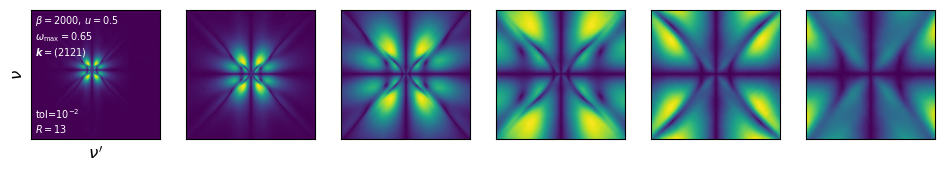

In [75]:

# good for R=13, transfer_offset=500
fig, axs = subplots(1, 6; figsize=(PLOT_PAGE_INCH, PLOT_PAGE_INCH*3/5))

maxref = maximum(abs.(slice_fat))
logmaxref = log10(maxref)
scfun(x::ComplexF64) = abs(x)
for i in 1:length(axs)
    if i>1
        slice = Nhalf-2^(R-i)+1 - div(transfer_offset,2):Nhalf+2^(R-i)-1 - div(transfer_offset,2)
    else
        slice = Nhalf-2^(R-i)+1:Nhalf+2^(R-i)-1
    end
    im = axs[i-1].imshow(scfun.(slice_fat[slice, slice]))
    remove_ticks(axs[i-1])
    # im.set_clim(logmaxref-2, logmaxref)
end
axs[0].set_xlabel(L"\nu'")
axs[0].set_ylabel(L"\nu")
annotate_topleft(
    axs[0], L"\beta=2000,\,u=0.5"*"\n"*L"\omega_{\max}=0.65"*"\n"*L"\boldsymbol{k}=(2121)";
    color="white", fontsize=7
)
annotate_bottomleft(
    axs[0], L"tol=$10^{-2}$"*"\n"*L"R=13";
    color="white", fontsize=7
)
# fig.tight_layout()
savefig("KeldyshZoom2.pdf", dpi=500)
display(fig)

In [90]:
# quick look at vertex...
using HDF5
V_KF = h5read(joinpath(basepath,"V_KF_conventional","V_KF_p_R=8.h5"), "V_KF");

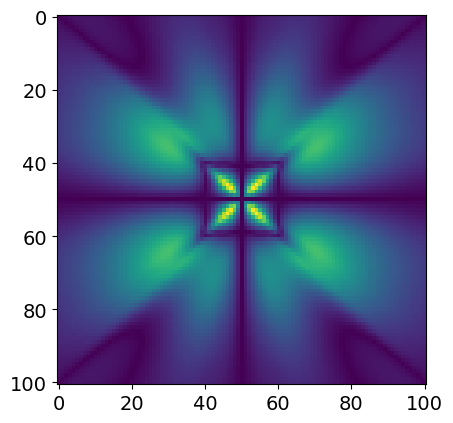

In [92]:
fig,ax = subplots()
scfun(x::ComplexF64) = abs(x)
ax.imshow(scfun.(V_KF[128,78:178,78:178,1,2,1,2]))
display(fig)

In [60]:
using HDF5
# Keldysh triptych data with slice_fat from cell above
iK = 6
ref = h5read(joinpath(basepath,"KFslice_beta2000","V_KF_dim1_slice512_R10_iK6.h5"), "V_KF")
ref2 = h5read(joinpath(basepath,"KFslice_u1.5","V_KF_dim1_slice512_R10_iK6.h5"), "V_KF")
# ref = V_KF[:,:,:,TCI4Keldysh.KF_idx(iK,3)...]
Nref = 2^10
@show size(ref)

size(ref) = (1024, 1024)


(1024, 1024)

In [134]:
using Serialization
import QuanticsGrids as QG

R = 10
Nhalf = 2^(R-1)
transfer_offset = 0
folder1 = joinpath(basepath, "KFslice_beta2000_TCI")
folder2 = joinpath(basepath, "KFslice_u1.5_TCI")

function get_qttslice(fd)
    qtt_file = only(filter(f -> endswith(f, "R=$(R)_qtt.serialized"), readdir(fd)))
    (tci, grid) = deserialize(joinpath(fd, qtt_file))

    bit_pos = collect(1:3:3*R)
    bit_val = fill(0, R)
    slice_idx = Nhalf+1+transfer_offset
    QG.index_to_quantics_fused!(bit_val, (slice_idx,))
    @show bit_val
    # ω=const
    rm_val = [ifelse(bit_val[i]==1, collect(1:2:8), collect(2:2:8)) for i in 1:R]
    # rm_val = [ifelse(bit_val[i]==1, collect(1:4), collect(5:8)) for i in 1:R]
    ttslice = TCI4Keldysh.project_legs(tci.sitetensors, collect(1:R), rm_val)
    @show size.(ttslice)
    slice_fat_q = TCI4Keldysh.qtt_to_fattensor(ttslice)
    slice_fat = TCI4Keldysh.qinterleaved_fattensor_to_regular(reshape(slice_fat_q, ntuple(_->2, 2*R)), R)
    @show size(slice_fat)
    return slice_fat
end

slice_fat1 = get_qttslice(folder1)
slice_fat2 = get_qttslice(folder2)
nothing

bit_val = [2, 1, 1, 1, 1, 1, 1, 1, 1, 1]
size.(ttslice) = [(1, 4, 8), (8, 4, 64), (64, 4, 189), (189, 4, 158), (158, 4, 67), (67, 4, 28), (28, 4, 12), (12, 4, 7), (7, 4, 4), (4, 4, 1)]
size(slice_fat) = (1024, 1024)
bit_val = [2, 1, 1, 1, 1, 1, 1, 1, 1, 1]
size.(ttslice) = [(1, 4, 8), (8, 4, 64), (64, 4, 216), (216, 4, 116), (116, 4, 40), (40, 4, 17), (17, 4, 8), (8, 4, 5), (5, 4, 3), (3, 4, 1)]
size(slice_fat) = (1024, 1024)


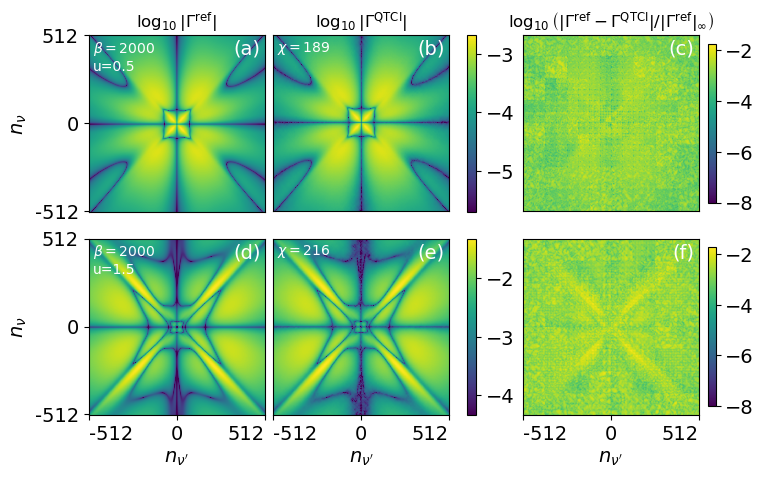

collect(xticks) = [1, 513, 1025]
maximum(abs.(diff)) = 0.018960362325786535
maximum(abs.(slice_fat)) = 0.04708869300004826
maximum(abs.(refslice)) = 0.04689994725469945


0.04689994725469945

In [145]:
refslices = [ref, ref2]
slices = [slice_fat1, slice_fat2]
nrow = length(refslices)
fig, axs = subplots(nrow,3, figsize=(PLOT_PAGE_INCH, PLOT_PAGE_INCH*2/5), layout="compressed")
# looks horrible with fontsize=12
# fig, axs = subplots(nrow,3, figsize=(PLOT_COLUMN_INCH, PLOT_COLUMN_INCH*2/5), layout="compressed")

window = 1:2^R
tol = -2

for i in 0:length(refslices)-1

    refslice = refslices[i+1]
    slice_fat = slices[i+1]
    maxref = maximum(abs.(refslice))
    lmaxref = log10(maxref)
    diff = (refslice .- slice_fat[window,window]) ./ maxref

    # plot
    im = axs[i,0].imshow((x -> log10(abs(x))).(refslice), cmap="viridis", interpolation="nearest")
    im.set_clim(lmaxref+tol-1, lmaxref)
    axs[i,0].set_ylabel(L"n_{\nu}")
    axs[i,0].invert_yaxis()
    xticks = 1:Nhalf:2^R+1
    if i==nrow-1
        axs[i,0].tick_params(axis="both", bottom=true, labelbottom=true, labelleft=true, left=true)
        axs[i,0].set_xlabel(L"n_{\nu'}")
        @show collect(xticks)
        axs[i,0].set_xticks(xticks, labels=["$(x-Nhalf-1)" for x in xticks])
        center_ticks(axs[i,0])
    else
        axs[i,0].tick_params(axis="both", bottom=false, labelbottom=false, labelleft=true, left=true)
    end
    axs[i,0].set_yticks(xticks, labels=["$(x-Nhalf-1)" for x in xticks])
    if i==0
        # CHANGE MANUALLY
        annotate_topleft(axs[i,0], L"\beta=2000" * "\n" * "u=0.5"; color="white", fontsize=10)
        annotate_topleft(axs[i,1], L"\chi=189"; color="white", fontsize=10)
    elseif i==1
        annotate_topleft(axs[i,0], L"\beta=2000" * "\n" * "u=1.5"; color="white", fontsize=10)
        annotate_topleft(axs[i,1], L"\chi=216"; color="white", fontsize=10)
    end

    im = axs[i,1].imshow((x -> log10(abs(x))).(slice_fat[window,window]), cmap="viridis", interpolation="nearest")
    fig.colorbar(im, fraction=0.045, ax=axs[i,0:1], location="right")
    im.set_clim(lmaxref+tol-1, lmaxref)
    axs[i,1].tick_params(axis="both", bottom=true, labelbottom=true, labelleft=false, left=false)
    if i==nrow-1
        axs[i,1].set_xlabel(L"n_{\nu'}")
        axs[i,1].set_xticks(xticks, labels=["$(x-Nhalf-1)" for x in xticks])
        center_ticks(axs[i,1])
    else
        axs[i,1].tick_params(axis="both", bottom=false, labelbottom=false, labelleft=false, left=false)
    end

    im2 = axs[i,2].imshow((x -> log10(abs(x))).(diff))
    fig.colorbar(im2, fraction=0.045, ax=axs[i,2], location="right")
    (low,up) = im2.get_clim()
    im2.set_clim(-8,up)
    if i==nrow-1
        axs[i,2].tick_params(axis="both", bottom=true, labelbottom=true, labelleft=false, left=false)
        axs[i,2].set_xlabel(L"n_{\nu'}")
        axs[i,2].set_xticks(xticks, labels=["$(x-Nhalf-1)" for x in xticks])
        center_ticks(axs[i,2])
    else
        axs[i,2].tick_params(axis="both", bottom=false, labelbottom=false, labelleft=false, left=false)
    end

    if i==0
        axs[i,0].set_title(L"\log_{10}|\Gamma^{\mathrm{ref}}|", fontsize=12)
        axs[i,1].set_title(L"\log_{10}|\Gamma^{\mathrm{QTCI}}|", fontsize=12)
        axs[i,2].set_title(L"\log_{10}\left(|\Gamma^{\mathrm{ref}}-\Gamma^{\mathrm{QTCI}}|/|\Gamma^{\mathrm{ref}}|_\infty\right)", fontsize=12)
    end

end

abc_annotate(axs;color="white")
savefig("KFvertex_triptych.pdf", dpi=500)
display(fig)
@show maximum(abs.(diff))
@show maximum(abs.(slice_fat))
@show maximum(abs.(refslice))